In [119]:
import numpy as np

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 为了中文显示
mpl.rcParams['axes.unicode_minus'] = False # 为了负数显示

In [55]:
def h(theta, X):
    return np.dot(X, theta)

In [101]:
def J(theta, X, y):
    m = len(X)
    return np.sum(np.dot( (h(theta,X)-y).T, h(theta,X)-y )/(2*m))

In [108]:
# 梯度下降
def bgd(alpha, maxloop, epsion, X, y):
    m, n = X.shape
    theta = np.zeros((2,1)) # 参数theta全部初始化为0
    count = 0 # 记录迭代轮次
    converged = False # 记录是否收敛
    error = np.inf # 当前代价函数的值
    errors = [] # 记录每一次迭代的代价函数值
    thetas = {0:[theta[0,0]], 1:[theta[1,0]]} # 记录每一轮参数theta的更新
    
    while count <= maxloop:
        if converged:
            break
        count += 1
        temp1 = theta[0,0] - alpha / m * (h(theta, X)- y).sum()
        temp2 = theta[1,0] - alpha / m * (np.dot(X[:,1][:,np.newaxis].T,(h(theta, X)-y))).sum()
        
        theta[0,0] = temp1
        theta[1,0] = temp2
        thetas[0].append(temp1)
        thetas[1].append(temp2)
        error = J(theta, X, y)
        errors.append(error)
        
        if(error< epsilon):
            converged = True
    return theta, errors, thetas

In [109]:
X = np.array([5,3,4,7,4,3,2,5,7,7,4,3,2])
X = X[:, np.newaxis] # 加一个维度，将一维变成两维
X.shape

(13, 1)

In [110]:
y = np.array([3,4,5,3,4,5,7,5,4,6,8,5,4])
y = y[:, np.newaxis] # 加一个维度，将一维变成两维
y.shape

(13, 1)

In [111]:
m, n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis = 1)

In [112]:
alpha = 0.02
maxloop = 1500
epsilon = 0.01

result = bgd(alpha, maxloop, epsilon, X, y)
theta, errors, thetas = result

In [113]:
xCopy = X.copy()
xCopy.sort(0)
yHat = h(theta, xCopy)

In [114]:
xCopy[:,1].shape, yHat.shape, theta.shape

((13,), (13, 1), (2, 1))

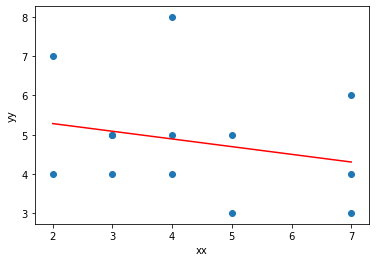

In [116]:
plt.xlabel(u'xx')
plt.ylabel(u'yy')
plt.plot(xCopy[:,1],yHat,color='r')
plt.scatter(X[:,1].flatten(), y.T.flatten())
plt.show()

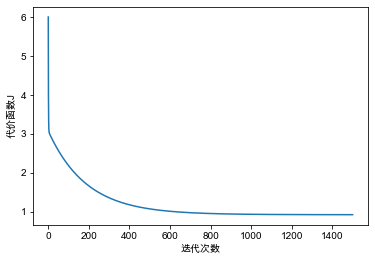

In [122]:
# 绘制代价曲线
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价函数J')
plt.plot(list(range(len(errors))), errors)
plt.show()

In [ ]:
theta

In [126]:
%matplotlib
from mpl_toolkits.mplot3d import axes3d
size = 100
theta0Vals = np.linspace(-10,10,size)
theta1Vals = np.linspace(-2,4, size)
JVals = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta0Vals[i]],[theta1Vals[j]]])
        JVals[i,j] = J(col, X, y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T

Using matplotlib backend: MacOSX


Text(0.5, 0, '$J(\\theta)$')

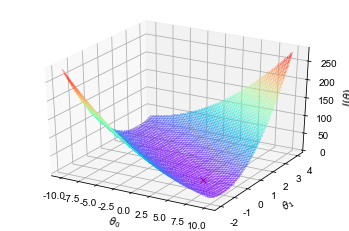

In [132]:
# abs绘制3d代价函数图形
import matplotlib

# %matplotlib inline
contourSurf = plt.figure()
ax = contourSurf.gca(projection='3d')

ax.plot_surface(theta0Vals, theta1Vals, JVals, rstride=2, cstride=2, alpha=0.3,
              cmap = matplotlib.cm.rainbow, linewidth=0, antialiased=False)
ax.plot(theta[0], theta[1], 'rx')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')


Text(0, 0.5, '$\\theta_1')

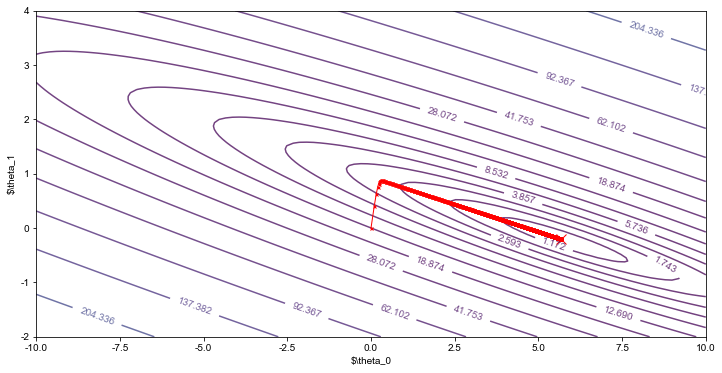

In [133]:
%matplotlib inline
# 绘制代价函数等高线图
plt.figure(figsize=(12,6))
CS = plt.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,30), alpha = .75)
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=3)

# 绘制梯度下降过程
plt.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1) # 每一次theta取值
plt.plot(thetas[0], thetas[1], 'r-', markersize=3, linewidth=1) # 用线连起来
plt.xlabel(r'$\theta_0')
plt.ylabel(r'$\theta_1')

